In [1]:
# Basic imports and configurations for DS
import warnings
import sys
assert sys.version_info >= (3,5)
import os

import pandas as pd
import  numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from IPython.display import display, HTML

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Suppress warnings
warnings.filterwarnings('ignore')

# Pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.precision', 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Matplotlib and Seaborn settings
plt.style.use('seaborn-v0_8')
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'figure.dpi': 100,
    'font.size': 12,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'axes.spines.top': False,
    'axes.spines.right': False,
    # Colorblind-friendly colors
    'axes.prop_cycle': plt.cycler(color=[
        '#0173B2', '#DE8F05', '#029E73', '#D55E00', 
        '#CC78BC', '#CA9161', '#FBAFE4', '#949494'
    ])
})

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Images")

# Create directory if they don't exist
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """
    Save a matplotlib figure with specific settings.
    
    Args:
        fig_id (str): Name of the figure
        tight_layout (bool): Whether to apply tight_layout (default=True)
        fig_extension (str): File extension (default="png")
        resolution (int): DPI resolution (default=300)
    """
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, bbox_inches='tight')
    print(f"Figure saved at: {path}")

# Print versions (useful for reproducibility)
print(f"Python version: {sys.version.split()[0]}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
print(f"Seaborn version: {sns.__version__}")


Python version: 3.12.2
Pandas version: 2.2.3
Matplotlib version: 3.10.0
Seaborn version: 0.13.2


# 1. Get Data

## 1.1 Download the Data

In [4]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
HOUSING_PATH = "housing_data"

# Function to fetch the data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """Download and extract housing data to a single folder"""
    
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        
    tgz_path = os.path.join(housing_path, "housing.tgz")
    
    # Download the tgz file
    urllib.request.urlretrieve(housing_url, tgz_path)
    
    # Extract the tgz file
    with tarfile.open(tgz_path) as housing_tgz:
        housing_tgz.extractall(path=housing_path)
    
    print(f"Data downloaded and extracted to {housing_path}")
    

In [5]:
fetch_housing_data()

Data downloaded and extracted to housing_data


In [6]:
# Function to load data to pandas
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

## 1.2 Take a look at the Data Structure

In [8]:
housing = load_housing_data()
print(housing.head(5))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   -122.230    37.880              41.000      880.000         129.000   
1   -122.220    37.860              21.000     7099.000        1106.000   
2   -122.240    37.850              52.000     1467.000         190.000   
3   -122.250    37.850              52.000     1274.000         235.000   
4   -122.250    37.850              52.000     1627.000         280.000   

   population  households  median_income  median_house_value ocean_proximity  
0     322.000     126.000          8.325          452600.000        NEAR BAY  
1    2401.000    1138.000          8.301          358500.000        NEAR BAY  
2     496.000     177.000          7.257          352100.000        NEAR BAY  
3     558.000     219.000          5.643          341300.000        NEAR BAY  
4     565.000     259.000          3.846          342200.000        NEAR BAY  


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB



- There are 20,640 instances in the dataset, which means that it is fairly small by
Machine Learning standards.

- Notice that the total_bedrooms attribute has only 20,433 nonnull values, meaning that 207
districts are missing this feature. Something we'll need to take care of later.

- All attributes are numerical, except the ocean_proximity field. Whose data type is an object, therefore it could hold any kind of Python object.

- From looking at the top five rows, we probably noticed that the values in the ocean_proximity column were repetitive, which means that it is probably a categorical attribute. The next step is finding out what categories exist and how many
districts belong to each category.

In [11]:
# Inspecting the categorical column; ocean proximity.
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [12]:
# Looking at the other attributes
print(housing.describe())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
count  20640.000 20640.000           20640.000    20640.000       20433.000   
mean    -119.570    35.632              28.639     2635.763         537.871   
std        2.004     2.136              12.586     2181.615         421.385   
min     -124.350    32.540               1.000        2.000           1.000   
25%     -121.800    33.930              18.000     1447.750         296.000   
50%     -118.490    34.260              29.000     2127.000         435.000   
75%     -118.010    37.710              37.000     3148.000         647.000   
max     -114.310    41.950              52.000    39320.000        6445.000   

       population  households  median_income  median_house_value  
count   20640.000   20640.000      20640.000           20640.000  
mean     1425.477     499.540          3.871          206855.817  
std      1132.462     382.330          1.900          115395.616  
min         3.000   

Some insights from this summary:

- There are missing values in total_bedrooms
- The median house value is capped at $500,001 (likely all values above were set to this)
- Median income appears to be scaled (likely in tens of thousands)
- There's a wide range in population density and housing sizes

**Another quick way to get a feel of the type of data you are dealing with is to
plot a histogram for each numerical attribute.**

Saving figure Histogram_plots_for_num_attributes
Figure saved at: ./Images/Histogram_plots_for_num_attributes.png


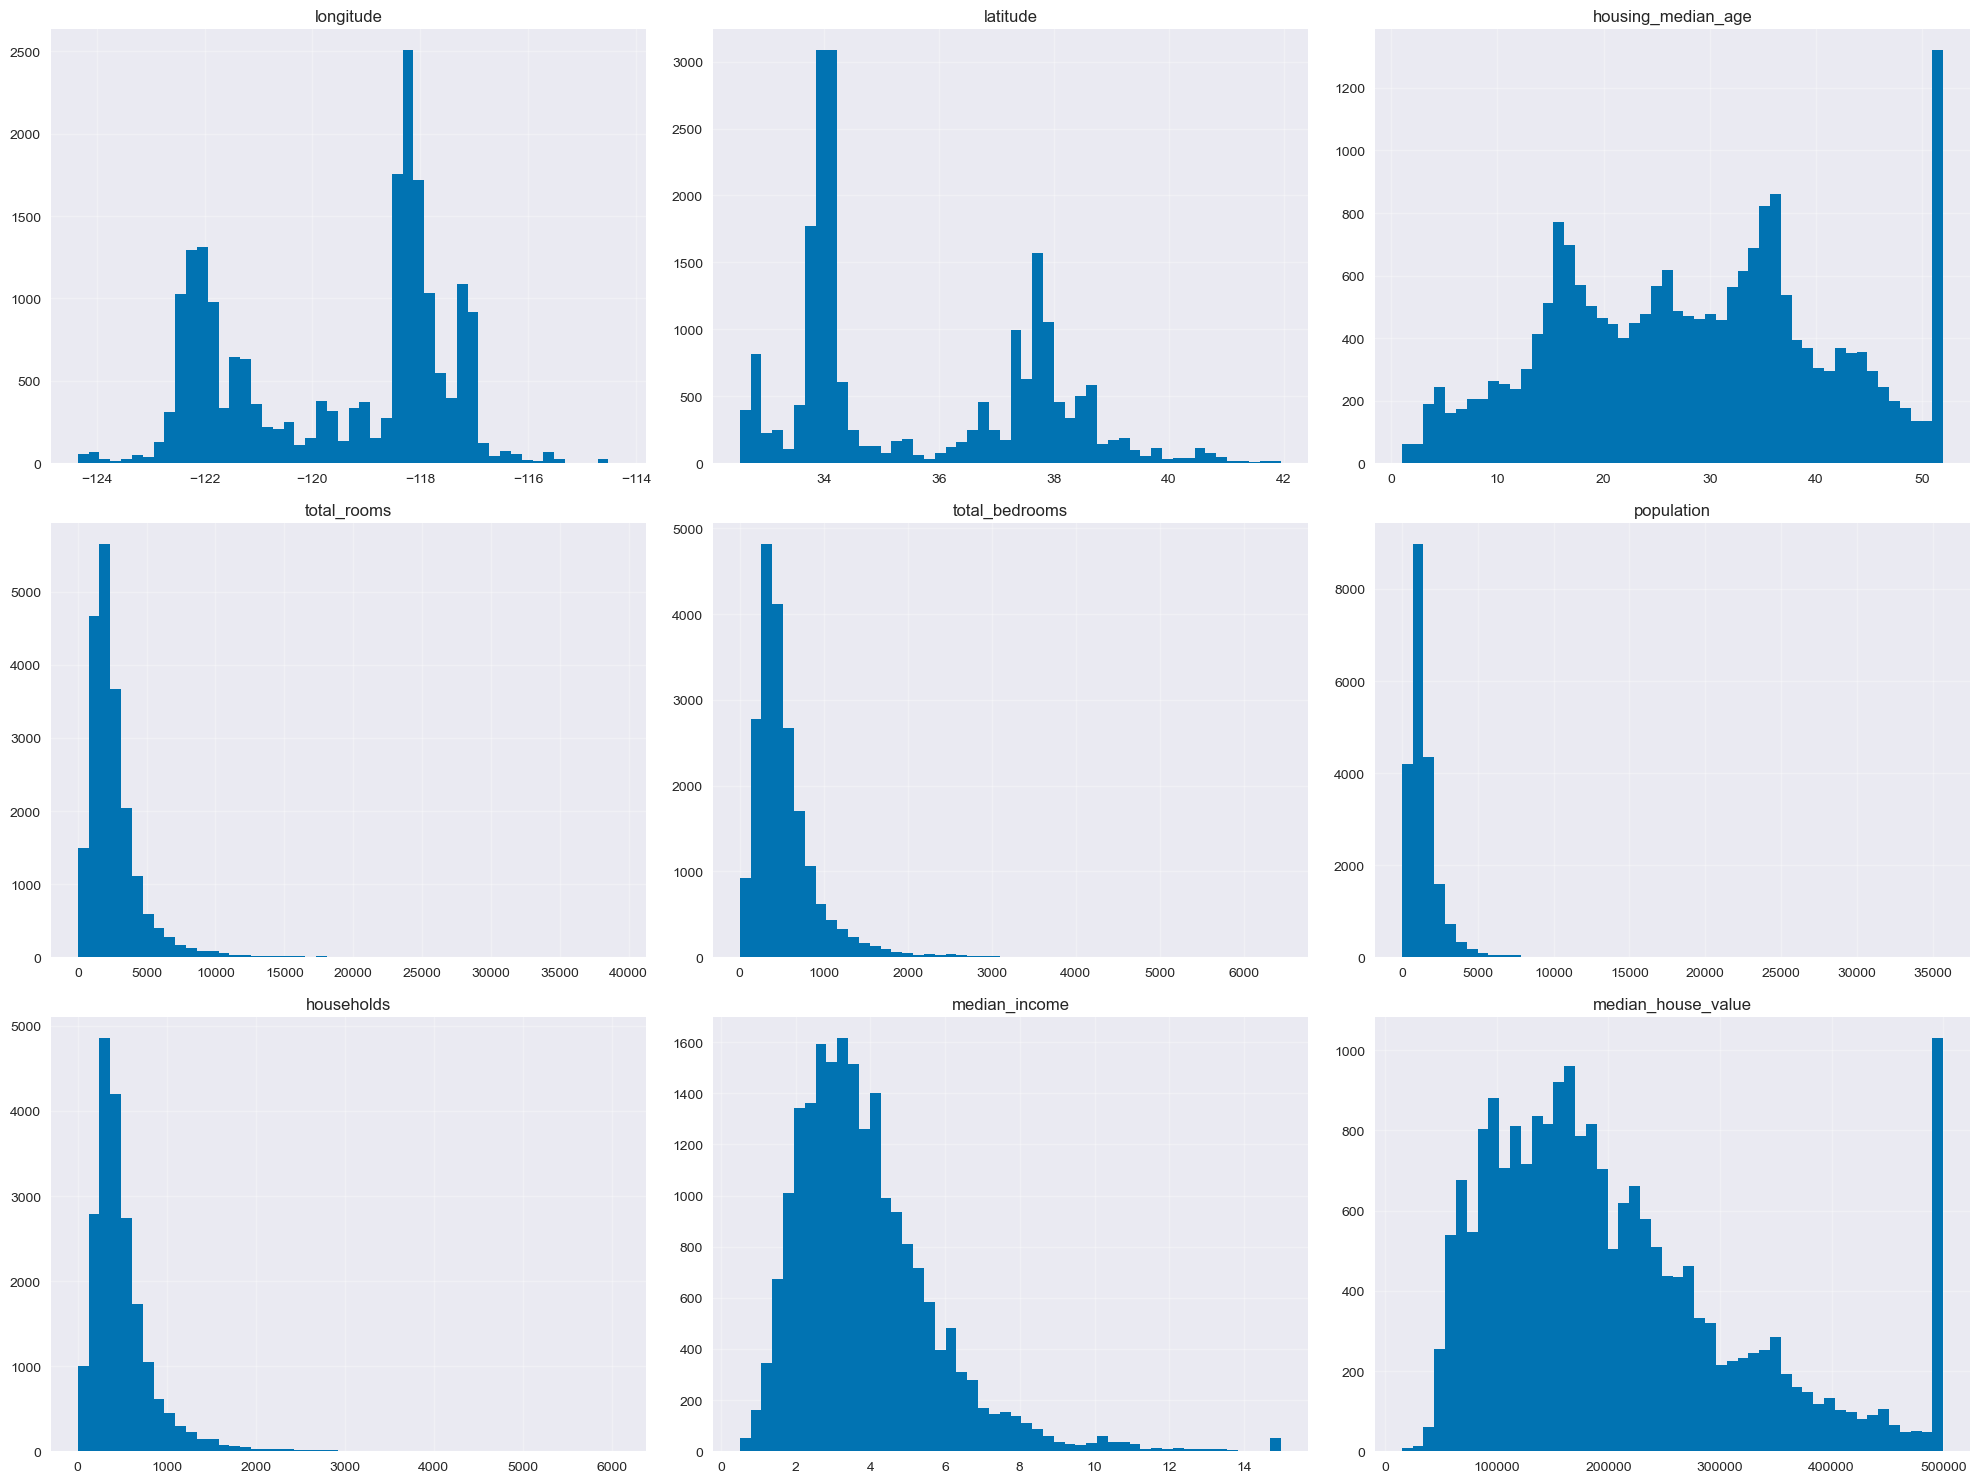

In [14]:
housing.hist(bins=50,figsize=(20,15))
save_fig("Histogram_plots_for_num_attributes")
plt.show()

Saving figure Seaborn_Histogram_plots
Figure saved at: ./Images/Seaborn_Histogram_plots.png


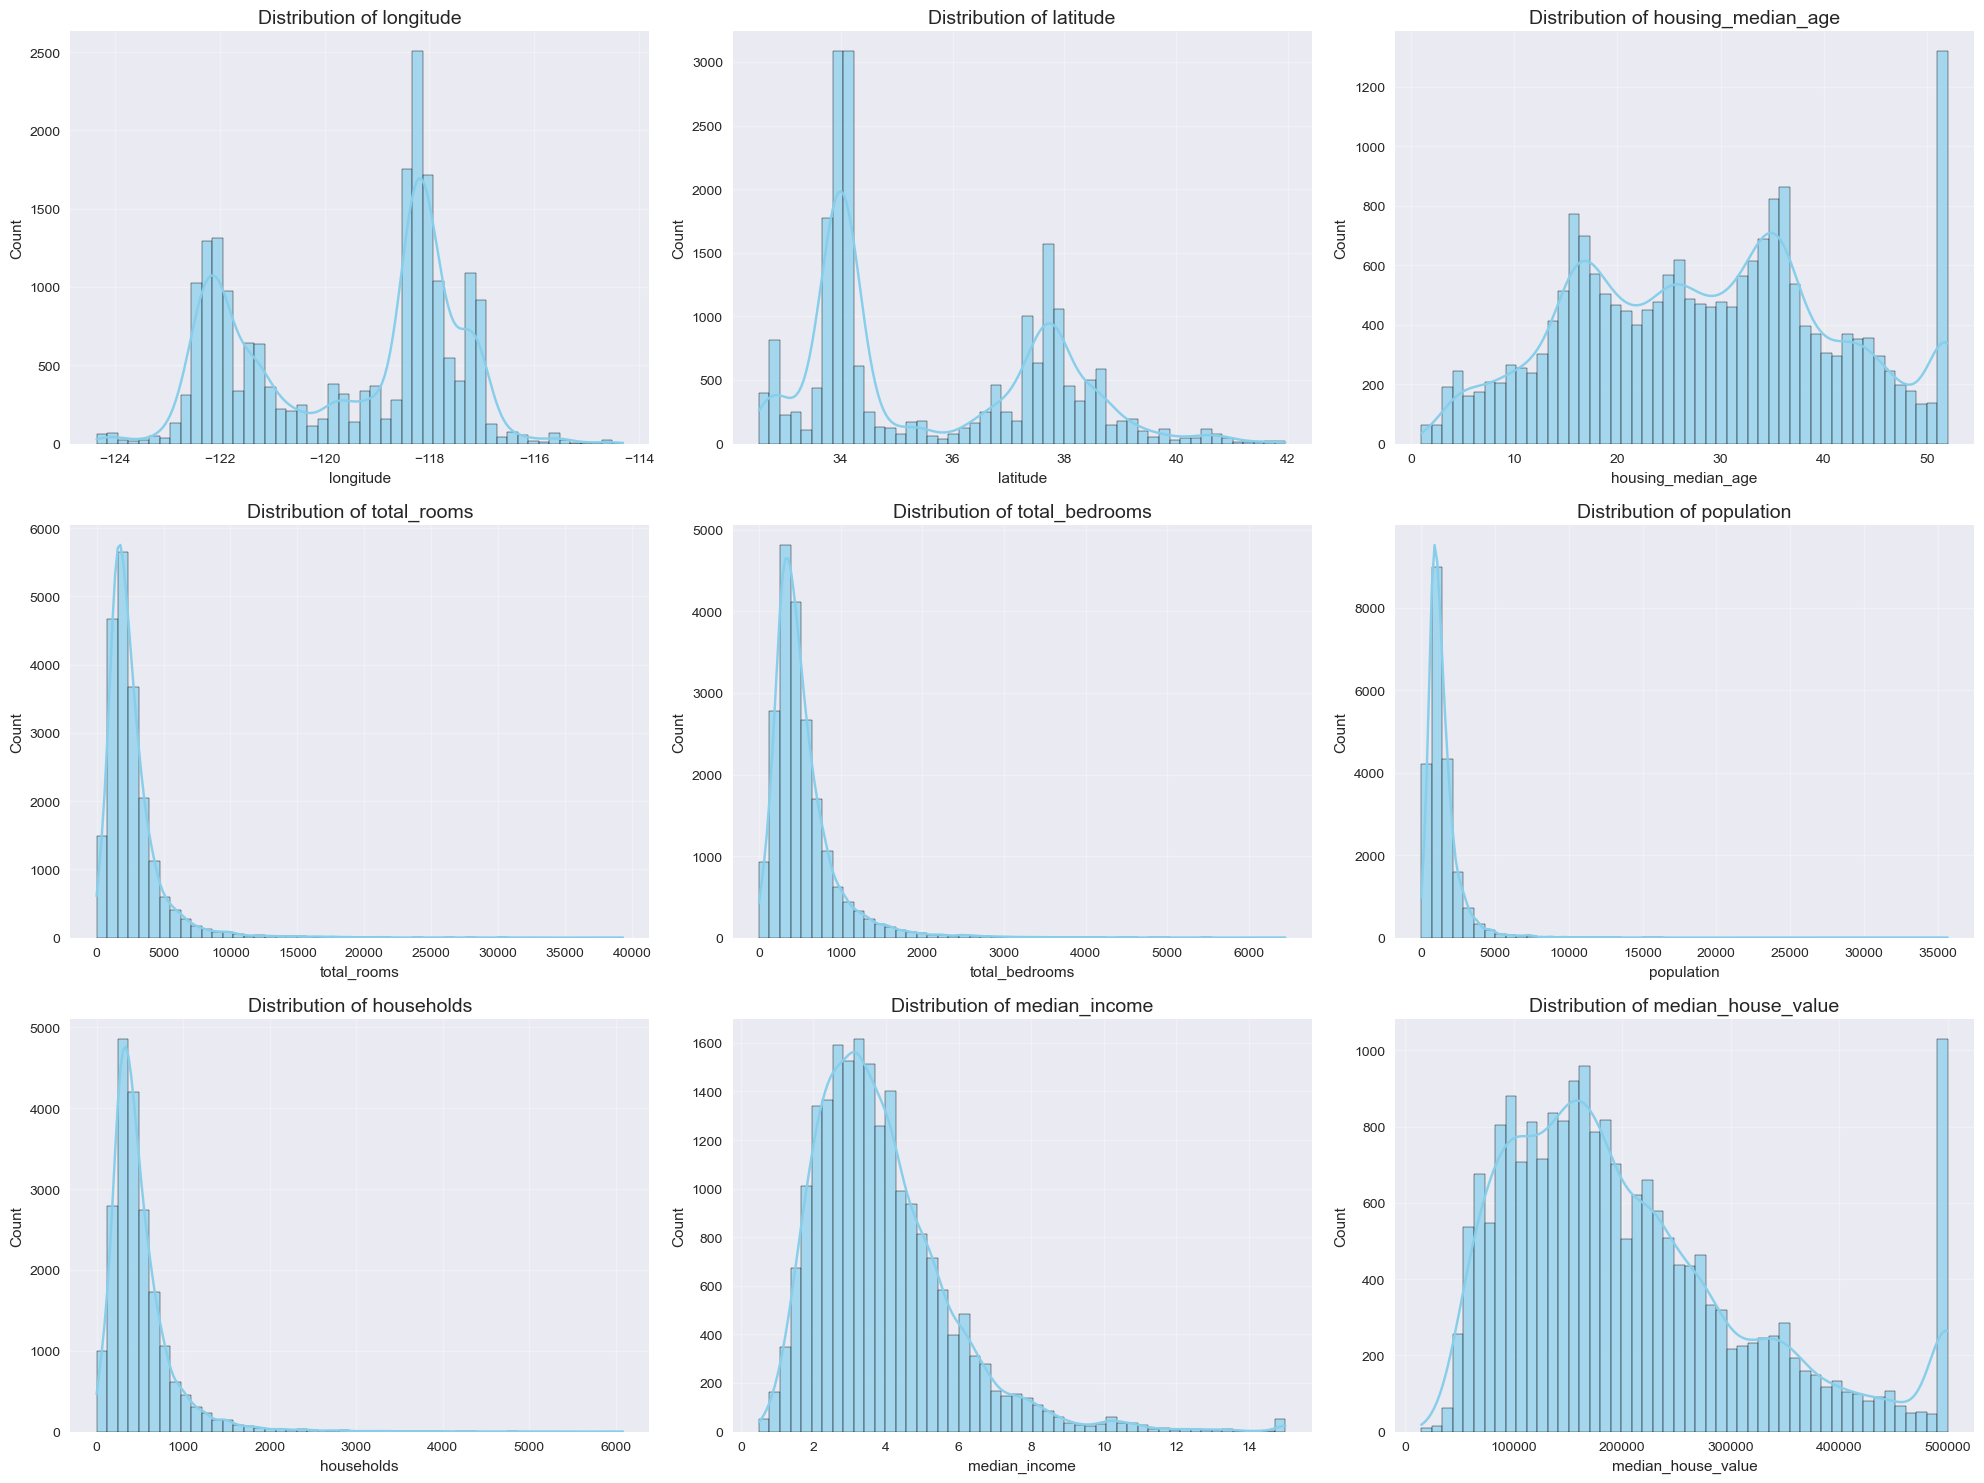

In [15]:
# Create a figure
plt.figure(figsize=(20, 15))

# Create subplots for each numerical column
for i, column in enumerate(housing.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 3, i + 1)
    
    # Create histogram with KDE
    sns.histplot(
        data=housing,
        x=column,
        kde=True,
        bins=50,
        color='skyblue',
        edgecolor='black',
        alpha=0.7
    )
    
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.tight_layout()

# Save the figure
save_fig("Seaborn_Histogram_plots")

plt.show()

Here is what the histograms reveal;
 1. The median income attribute does not look like it is expressed in dollars, which further reiterates or reaffirms our previous suspicion. Hence, we need to check with the team that collected the data.
 2. The housing median age and the median house value were also capped. The latter might be serious since it is our target attribute(label). We don't want our machine to learn that house prices never go beyond that limit. It will be good to check with your client team to see if this is a problem or not.

    If they tell you that they need precise predictions even beyond $500,000, then you have two  options:
    a. collect proper labels for the districts whose labels were capped.
    
    b. Remove those districts from the training set (and also from the test set, since the system shouldn't be evaluated poorly if it predicts values beyond $500,000)
  3. The above attributes have very different scales that need to be feature engineered.
  4. Finally, many histograms are heavy tail; they extend further to the right of the median than to the left. This may be harder for some machine algorithms to detect patterns. Therefore, there is need to transform these attributes to  have more bell-shaped distributions before training a model.
    

# 2. Create Test Set

Setting aside part of the data at this stage is very important. We wouldn’t want to encounter problems like overfitting because the model we are building has been exposed to  the data and must have learned a bit. 

This phenomenon is called **data snooping bias.**


In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets(80% train, 20% test)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(f"Training set size: {len(train_set)}")
print(f"Test set size: {len(test_set)}")


Training set size: 16512
Test set size: 4128


### Food for thought

The general understanding among experts is  that median income is a very important attribute in predicting median housing prices. Therefore it is important to ensure that the test set is representative of the various categories of incomes in the whole dataset.

Since the median income is a continuous numerical attribute, there is a need to create an income category attribute.

most median income values are clustered around 1.5 to 6 (i.e., $15,000–$60,000), but some
median incomes go far beyond 6. It is important to have a sufficient number of instances in the dataset for each stratum, or else the estimate of a stratum’s importance may be biased.

Thus creating an income category with 5 categories(labels from 1 to 5), cat 1 ranges from 0 to 1.5, cat 1.5 to 3 and so for forth.


Saving figure Median_Income_Histogram
Figure saved at: ./Images/Median_Income_Histogram.png


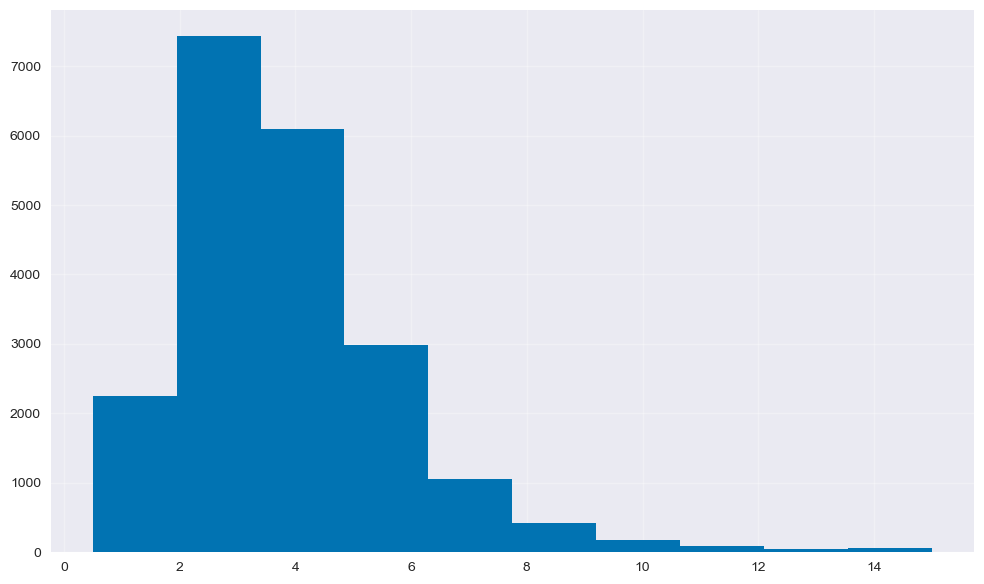

In [21]:
# create a histogram for median income
housing["median_income"].hist()
save_fig("Median_Income_Histogram")
plt.show()

In [22]:
# create a categorical median_income attribute
housing["income_cat"]= pd.cut(housing["median_income"], 
                              bins=[0., 1.5, 3.0, 4.5,6., np.inf],
                              labels=[1,2,3,4,5])

In [23]:
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

Saving figure Categorical_Median_Income_Histogram
Figure saved at: ./Images/Categorical_Median_Income_Histogram.png


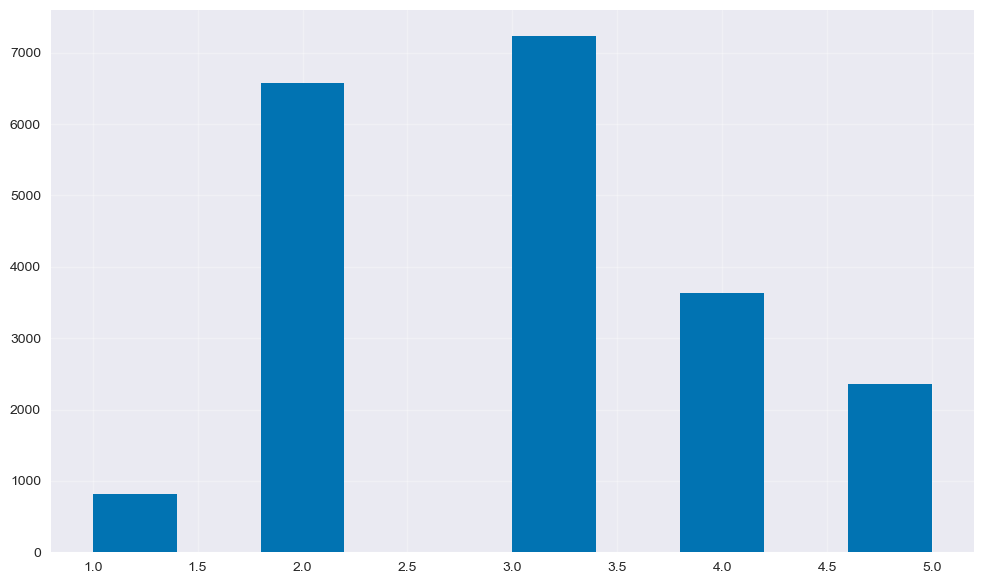

In [24]:
housing["income_cat"].hist()
save_fig("Categorical_Median_Income_Histogram")
plt.show()


# 3. Stratified Sampling Based on the Income Category. 

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [27]:
#check whether this worked by checking test_set
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3   0.351
2   0.319
4   0.176
5   0.114
1   0.040
Name: count, dtype: float64

We can create a Dataframe to compare the income category proportions in the overall dataset, in the test set generated with stratified sampling, and in a test set generated using purely random sampling.

In [29]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [30]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.040,0.040,0.040,0.973,0.365
2,0.319,0.319,0.324,1.732,-0.015
3,0.351,0.351,0.359,2.266,-0.014
4,0.176,0.176,0.167,-5.056,0.027
5,0.114,0.114,0.109,-4.318,-0.085


As you can see, the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is skewed.

In [32]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# 4. EDA- Discover and Visualize the Data to Gain Insights

Having taken a quick glance at the data to get a general understanding of the kind of data we are manipulating. Now the goal is to go into a little more depth.

First, is to make sure we have put the test set aside and we are only exploring the training set. Also, if the training set is very large, we may want to sample an exploration set, to make manipulations easy and fast. 

Let’s create a copy so that we can play with it without harming the training set:

In [35]:
# Create a copy of training set
housing = strat_test_set.copy()

In [36]:
print(housing.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5241    -118.390    34.120              29.000     6447.000        1012.000   
17352   -120.420    34.890              24.000     2020.000         307.000   
3505    -118.450    34.250              36.000     1453.000         270.000   
7777    -118.100    33.910              35.000     1653.000         325.000   
14155   -117.070    32.770              38.000     3779.000         614.000   

       population  households  median_income  median_house_value  \
5241     2184.000     960.000          8.282          500001.000   
17352     855.000     283.000          5.010          162500.000   
3505      808.000     275.000          4.384          204600.000   
7777     1072.000     301.000          3.271          159700.000   
14155    1495.000     614.000          4.353          184000.000   

      ocean_proximity  
5241        <1H OCEAN  
17352       <1H OCEAN  
3505        <1H OCEAN  
7777        <1H OCEA

## 4.1 Visualizing Geographical Data

With this geographical information (latitude and longitude), it is a good idea to create a scatterplot of all districts to visualize the data.

### 4.1.1 Using Scatter plots 

Saving figure A Scatterplot of Houses in all Districts-California
Figure saved at: ./Images/A Scatterplot of Houses in all Districts-California.png


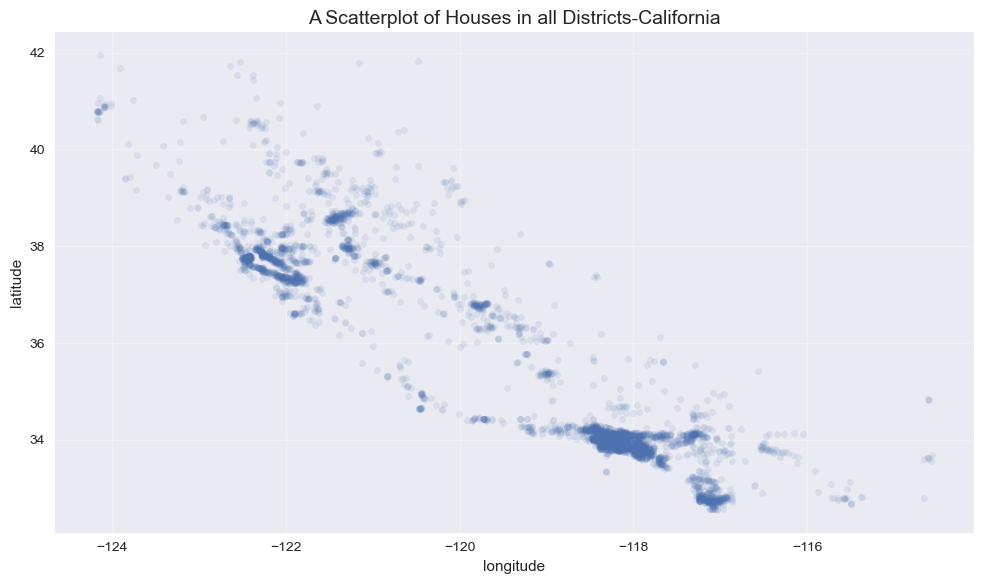

In [40]:
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)
plt.title('A Scatterplot of Houses in all Districts-California', fontsize=14)
save_fig("A Scatterplot of Houses in all Districts-California")
plt.show()

This data looks like California, and we can also see some traces of a particular pattern regarding the high density of data points. We can set alpha=0.1, which makes it much easier to visualise the high density areas.

### 4.1.2 Using Binned 2D Density Plot (Heatmap) 

Saving figure Housing Density Map
Figure saved at: ./Images/Housing Density Map.png


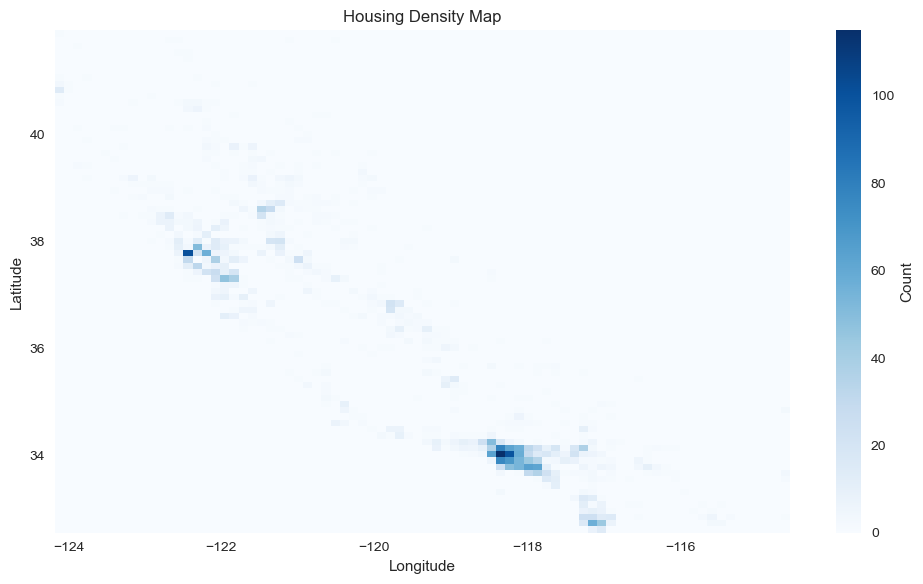

In [43]:
plt.hist2d(housing['longitude'], housing['latitude'], bins=80, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Housing Density Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
save_fig('Housing Density Map')
plt.show()

That’s much better: we can see the high-density areas, namely the Bay Area and around Los Angeles and San Diego, plus a long line of fairly high density in the Central Valley, in particular around Sacramento and Fresno.

### 4.1.3 Visualizing Houses in all districts in the light of housing prices

Saving figure housing_prices_scatterplot
Figure saved at: ./Images/housing_prices_scatterplot.png


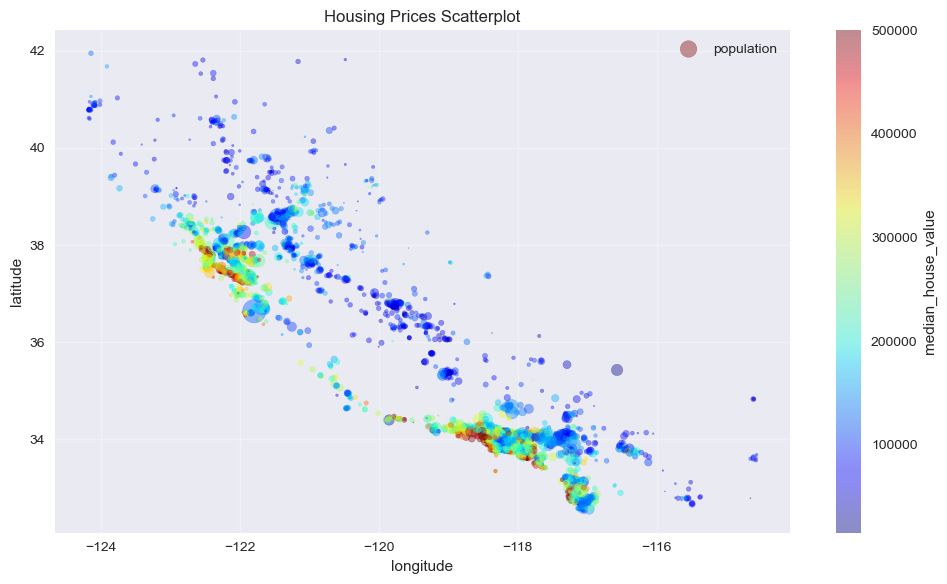

In [46]:
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.4,
             s=housing["population"]/100, label="population",
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False
)
plt.title("Housing Prices Scatterplot")
plt.legend()
save_fig("housing_prices_scatterplot")
plt.show()

### 4.1.4  Adding a map to the above plot

In [58]:
images_path = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/california.png', <http.client.HTTPMessage at 0x315b0fef0>)

Saving figure california_housing_prices_plot
Figure saved at: ./Images/california_housing_prices_plot.png


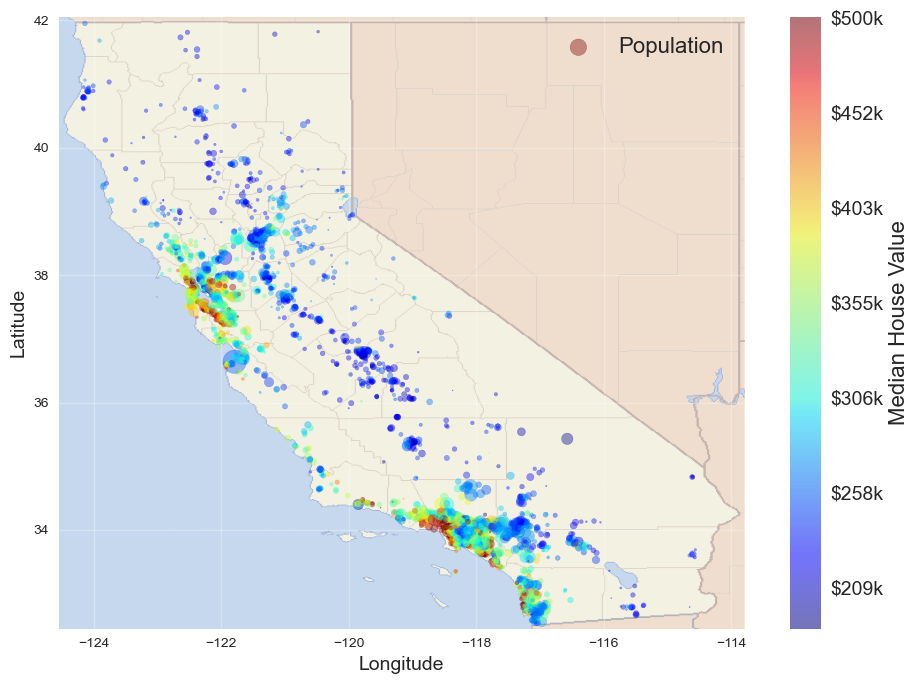

In [62]:
# Create a data visualization of California housing prices on a map

import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

- The radius of each circle represents the district’s population (option s), and the color represents the price(option c).

- This image substantiates that housing prices are very much related to location (e.g., being close to the ocean) and population density.

- A clustering algorithm should be useful for detecting the main cluster and for adding new features that measure the proximity to the cluster's center.


# 5. Looking for Correlations

We need to compute the **standard correlation coefficient** (also called **Pearson’s r**)  between every pair of attributes using the corr() method.

It is important to look how much each attributes correlates with the median house value.

**Note:** The corr() method only works with numeric data.

# Filter to only include numeric columns
numeric_columns = housing.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()

In [67]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000
median_income         0.692
total_rooms           0.131
housing_median_age    0.071
households            0.071
total_bedrooms        0.057
population           -0.016
longitude            -0.040
latitude             -0.150
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation.

Another way to check for correlation between attributes is to use the pandasscatter_matrix() 

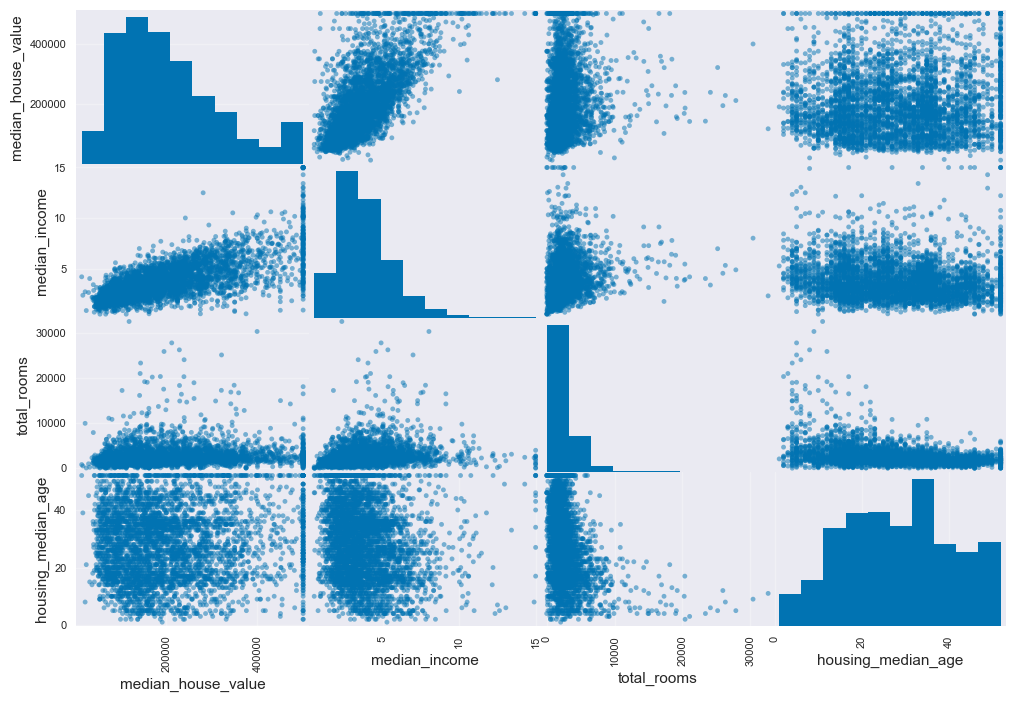

In [77]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()